# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected|
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, standard error, and the values at the 5th and 95th percentiles) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [1]:
import pandas as pd
ds = pd.read_csv("progresa_sample.csv")

In [2]:
nonNumeric = list(ds.select_dtypes(include='object').columns)
print(f"non-numeric variables: {nonNumeric}")

for var in nonNumeric:
    
    print((f"unique vars for {var}: {ds[var].value_counts().keys()}"))
    if var == 'poor':
        ds.loc[ds[var]=='pobre', var] = 1
        ds.loc[ds[var]=='no pobre', var] = 0  
    elif var == 'progresa':
        ds.loc[ds[var]=='basal', var] = 1
        ds.loc[ds[var]=='0', var] = 0

#describe() automatically handles null values when computing stats so need to take further action at this step

non-numeric variables: ['poor', 'progresa']
unique vars for poor: Index(['pobre', 'no pobre'], dtype='object', name='poor')
unique vars for progresa: Index(['basal', '0'], dtype='object', name='progresa')


In [3]:
#print summary
(ds.describe(percentiles=[0.05, 0.95]).T)[['mean', 'std', '5%', '95%']].drop(['year', 'folnum', 'village']).sort_index()

,mean,std,5%,95%
age,11.366460,3.167744,7.000000,16.000000
dist_cap,147.674452,76.063134,43.885501,289.015701
dist_sec,2.418910,2.234109,0.000000,5.875000
fam_n,7.215715,2.352900,4.000000,11.000000
grc,3.963537,2.499063,0.000000,8.000000
grc97,3.705372,2.572387,0.000000,8.000000
hohage,44.436717,11.620372,29.000000,66.000000
hohedu,2.768104,2.656106,0.000000,7.000000
hohsex,0.925185,0.263095,0.000000,1.000000
hohwag,586.985312,788.133664,0.000000,1440.000000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').


In [4]:
from scipy.stats import ttest_ind

ds_base_p_t = ds[(ds['year']==97) & (ds['poor']==1) & (ds['progresa']==1)]
ds_base_p_c = ds[(ds['year']==97) & (ds['poor']==1) & (ds['progresa']==0)]


varsNames_ex = ['year', 'poor', 'progresa', 'folnum', 'village']

res = []
for var in sorted(ds.columns): 
    if var not in varsNames_ex:
        mean_t = ds_base_p_t[var].mean(skipna=True)
        mean_c = ds_base_p_c[var].mean(skipna=True)
        _, pVal = ttest_ind(ds_base_p_t[var].dropna(), ds_base_p_c[var].dropna(), equal_var=False)
        pVal = round(pVal, 3)
        diff = mean_t - mean_c
        res.append([var, mean_t, mean_c, diff, pVal])
        
pd.DataFrame(res, columns=["Variable name", "Average value (Treatment villages)",
                                         "Average value (Control villages)", "Difference (Treat - Control)", "p-value"])

       

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.716991,10.742023,-0.025032,0.478
1,dist_cap,150.829074,153.769730,-2.940656,0.001
2,dist_sec,2.453122,2.507662,-0.054540,0.043
3,fam_n,7.281327,7.302469,-0.021142,0.429
4,grc,3.531599,3.543050,-0.011450,0.690
5,grc97,3.531599,3.543050,-0.011450,0.690
6,hohage,43.648828,44.276918,-0.628090,0.000
7,hohedu,2.663139,2.590348,0.072791,0.010
8,hohsex,0.924656,0.922947,0.001709,0.572
9,hohwag,544.339544,573.163558,-28.824015,0.000


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline? 
* C: What does this imply about how to measure the impact of the treatment?

#### your interperation here

A. Yes, it seems there are some pretty significant differences between treatment and control cases, according to p-values in the table (referring to all variables with a p-value less than 0.05). This tells us that the differences are not just random and are statistically significant.

B. Because if treatment and control groups were already different before the treatment, that could mess with how we interpret the results. For example if the treatment group is wealthier or closer to the capital at baseline, those differences could make it look like the treatment is working better (or worse) than it actually is. So we better make sure the initial differences don’t skew our results. 

C. We see that there are significant baseline differences between the groups, so we need to make sure that the estimation of treatment impact is adjusted. We could have different options like matching the treatment and control cases on their baseline features. Or we can adjust themby adding them as controls in a regression model. This is all to ensure that the treatment affects are measured properly.


### 1.4 Graphical exploration

Visualize the distribution of village enrollment rates among poor households in treated villages, before and after treatment.

Specifically, for each treated village:

- First, calculate the average rate of enrollment of poor households in 1997.
- Then, compute the average rate of enrollment of poor households in 1998.
- Create a graph showing the distribution of these average enrollment rates (one histogram for 1997 and one histogram for 1998). On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). 
- Ensure that your graph is well formatted / publication quality -- add a title, x-axis labels, a legend, and any other elements as necessary.

Then, answer the following questions:
- Does there appear to be a difference between the average enrolment rates in 1997 and 1998? Is this difference statistically significant?

Now, repeat the process, and generate a second set of graphs comparing the distributions for non-poor households, before and after treatment.

- Does there appear to be a difference between the average enrolment rates in 1997 and 1998? Is this difference statistically significant?


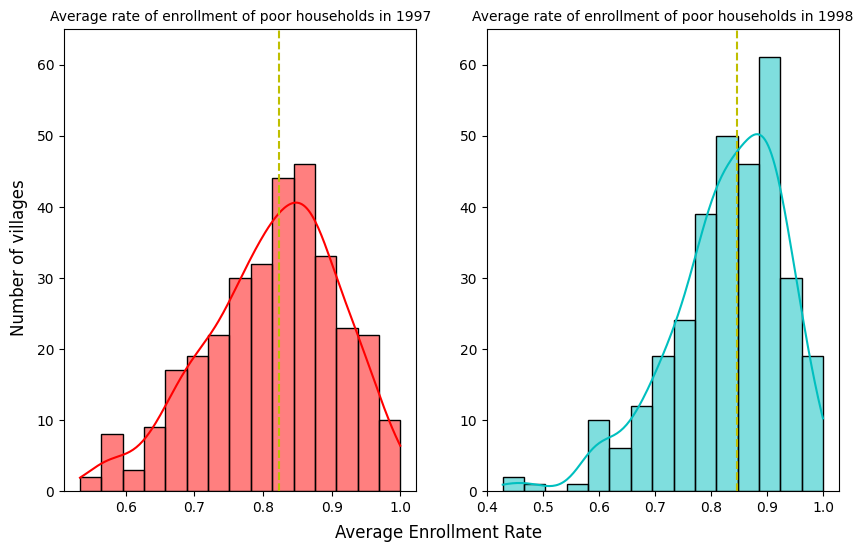

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

ds_e97 = ds[(ds['poor']==1) & (ds['progresa']==1) & (ds['year']==97)]
ds_e98 = ds[(ds['poor']==1) & (ds['progresa']==1) & (ds['year']==98)]
vilNames = ds_e97['village'].unique()
# print(vilNames)

m97_t = []
m98_t = []
for vil in vilNames:
    m97 = ds_e97[ds_e97['village']==vil]['sc'].mean(skipna=True)
    m98 = ds_e98[ds_e98['village']==vil]['sc'].mean(skipna=True)
    m97_t.append([vil, m97])
    m98_t.append([vil, m98])



pdm97 = pd.DataFrame(m97_t, columns=["Village name", "Average enrollment rate"])
pdm98 = pd.DataFrame(m98_t, columns=["Village name", "Average enrollment rate"])

fig = plt.figure(figsize=(10, 6))

plt1 = plt.subplot(1,2,1)
sns.histplot(pdm97['Average enrollment rate'], bins=15, kde=True, color='r')
plt1.set_title('Average rate of enrollment of poor households in 1997', fontsize=10)
plt1.axvline(ds_e97['sc'].mean(skipna=True), c='y', ls='--')
plt1.set_xlabel('') 
plt1.set_ylabel('') 
plt1.set_ylim(0, 65)


plt2 = plt.subplot(1,2,2)
sns.histplot(pdm98['Average enrollment rate'], bins=15, kde=True, color='c')
plt2.set_title('Average rate of enrollment of poor households in 1998', fontsize=10)
plt2.axvline(ds_e98['sc'].mean(skipna=True), c='y', ls='--')
plt2.set_xlabel('') 
plt2.set_ylabel('') 
plt2.set_ylim(0, 65)

fig.text(0.5, 0.04, 'Average Enrollment Rate', ha='center', va='center', fontsize=12) 
fig.text(0.08, 0.5, 'Number of villages', ha='center', va='center', rotation='vertical', fontsize=12) 


plt.subplots_adjust() 

In [6]:
print(f"Average rate of enrollment of poor households in 1997: {ds_e97['sc'].mean(skipna=True)}")
print(f"Average rate of enrollment of poor households in 1998: {ds_e98['sc'].mean(skipna=True)}")
x=ttest_ind(pdm97["Average enrollment rate"], pdm98["Average enrollment rate"], equal_var=False)
print(x)

Average rate of enrollment of poor households in 1997: 0.8226968874033842
Average rate of enrollment of poor households in 1998: 0.8464791213954308
TtestResult(statistic=np.float64(-2.0157134865155815), pvalue=np.float64(0.044249343422594324), df=np.float64(637.0225428028766))


We can see a 2.015 difference between the two groups. Given that the p-value between cases of 97 and 98 is less than 0.05, we can reject the null hypothesis and say that there is a statistically significant difference there. 

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [7]:
ds_t = ds[(ds['poor']==1) & (ds['progresa']==1) & (ds['year']==98)]
ds_c = ds[(ds['poor']==1) & (ds['progresa']==0) & (ds['year']==98)]

print(f"Average rate for treatment: {ds_t['sc'].mean(skipna=True)}")
print(f"Average rate for control  : {ds_c['sc'].mean(skipna=True)}")
print(f"Difference: {ds_t['sc'].mean(skipna=True) - ds_c['sc'].mean(skipna=True)}")

vilNames_t = ds_t['village'].unique()
vilNames_c = ds_c['village'].unique()
ds_tM_T = []
ds_cM_T = []
for vil in vilNames_t:
    ds_tM = ds_t[ds_t['village']==vil]['sc'].mean(skipna=True)
    ds_tM_T.append([vil, ds_tM])

for vil in vilNames_c:
    ds_cM = ds_c[ds_c['village']==vil]['sc'].mean(skipna=True)
    ds_cM_T.append([vil, ds_cM])

pd_t = pd.DataFrame(ds_tM_T, columns=["Village name", "Average enrollment rate"])
pd_c = pd.DataFrame(ds_cM_T, columns=["Village name", "Average enrollment rate"])

ttest_ind (pd_t["Average enrollment rate"], pd_c["Average enrollment rate"], equal_var=False)

Average rate for treatment: 0.8464791213954308
Average rate for control  : 0.807636956730308
Difference: 0.0388421646651228


TtestResult(statistic=np.float64(2.5286761113653253), pvalue=np.float64(0.011846703733412126), df=np.float64(386.301636050644))

Again the p-value is less than 0.05, so we can reject the null hypothesis and say that there is a statistically significant difference between the control and treatment cases. Poor people with treatment had a higher average rate; meaning the program had a positive effect on enrollment rates among poor households in treatment villages.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that a person with no technical background could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [8]:
import statsmodels.formula.api as smf

ds_e = ds[(ds['poor']==1) & (ds['year']==98)]
singleVarModel = smf.ols("sc ~ progresa", data=ds_e).fit()
print(singleVarModel.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           6.64e-17
Time:                        04:40:31   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8076      0.004    220.676

* We see that the intercept is 0.8076 and the progresa coefficient is 0.0388. so it tells us that in 998, progresa increased the likelihood of a child enrolling in school by 0.0388. All else being equal, children in villages that received treatment were 3.88% more likely to enroll in school compared to those in control villages.
* Difference in part 2.1 is 0.0388, so we see that they're both the same.
* YES. p-value is less than 0.05 (0.00), based on the regression model. So we can reject the null hypothesis that the treatment effect is zero.
* "The only difference between the treatment and control groups is the treatment itself" OR "In the absence of progresa program, children in treatment villages would have had the same enrollment rate as those in control villages"

### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [9]:
multiVarModel = smf.ols("sc ~ age + dist_cap + dist_sec + hohedu + hohwag + indig + min_dist + progresa + sex + welfare_index", data=ds_e).fit()
print(multiVarModel.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1020.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:40:36   Log-Likelihood:                -7543.3
No. Observations:               27267   AIC:                         1.511e+04
Df Residuals:                   27256   BIC:                         1.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4488      0.015     97.582

* Including control variables decreases the estimated coefficient on the treatment effect
* There is very little effect on the standard error
* Controlling for other observable factors decreased the estimated treatment effect - or put differently, without controlling for other factors, the estimates of the treatment effect in 2.2 were likely *over*-estimates of the true treatment effect. This is likely due to the fact that other factors were correlated with both treatment and outcomes (as we saw in 1.2).
* The -0.0106 coefficient associated with dist_sec indicates that with a unit increase in dist_sec the enrollment of poor on average decreases by ~ 0.10%, holding all the other variables constant. This does not indicate a causal effect since dist_sec is the control variable, which isn't randomly assigned and is only added to the regression to account for other systematic differences in the treatment and control groups.

### 2.4 Multiple Regression Revisited

For the same set of control variables that you used in 2.3, carry out the following alternative estimation procedure. 

* First, regress the 1998 enrollment of the poor on the control variables, **without including the treatment assignment.** 
* Second, use this model to obtain predicted values of the 1998 enrollment for each child in the sample used to estimate the model in step 1. 
* Third, compute a new value for each child, which is the difference between the actual 1998 enrollment and the predicted enrollment value from step 2. 
* Finally, regress the difference from step 3 on treatment assignment.

Compare the point estimate and the standard error on treatment assignment that you obtained in step 4 to their analogues in 2.3. Explain the results.

In [10]:
ds_98 = ds[(ds['year'] == 98) & (ds['poor'] == 1)].copy()

_multiVarModel = smf.ols("sc ~ age + dist_cap + dist_sec + hohedu + hohwag + indig + min_dist + progresa + sex + welfare_index", data=ds_98).fit()
print(_multiVarModel.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1020.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:40:40   Log-Likelihood:                -7543.3
No. Observations:               27267   AIC:                         1.511e+04
Df Residuals:                   27256   BIC:                         1.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4488      0.015     97.582

In [11]:
ds_98['predicted_rate'] = _multiVarModel.predict(ds_98)
ds_98['res_rate'] = ds_98['sc'] - ds_98['predicted_rate']
res_multiVarModel = smf.ols("res_rate ~ progresa", data=ds_98).fit()
print(res_multiVarModel.summary())

                            OLS Regression Results                            
Dep. Variable:               res_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               1.00
Time:                        04:40:40   Log-Likelihood:                -7543.3
No. Observations:               27267   AIC:                         1.509e+04
Df Residuals:                   27265   BIC:                         1.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.095e-14      0.003  -3.49e-12

The alternative estimation procedure yields very similar results as the multiple regression estimated in 2.3. We can think of multiple regression as providing an estimate of the linear relationssip between treatment assignment and the residual variance of the outcome that is not explained by the controls. 

### 2.5 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [12]:
ds_t97 = ds[(ds['poor']==1) & (ds['progresa']==1) & (ds['year']==97)]
ds_c97 = ds[(ds['poor']==1) & (ds['progresa']==0) & (ds['year']==97)]

ds_t98 = ds[(ds['poor']==1) & (ds['progresa']==1) & (ds['year']==98)]
ds_c98 = ds[(ds['poor']==1) & (ds['progresa']==0) & (ds['year']==98)]

A = ds_t97['sc'].mean(skipna=True) 
B = ds_c97['sc'].mean(skipna=True) 
C = ds_t98['sc'].mean(skipna=True) 
D = ds_c98['sc'].mean(skipna=True) 

tab = pd.DataFrame({'1997': [A, B], '1998': [C, D]}, index=['Control', 'Treatment'])
print(f"Difference-in-difference estimate of the impact:{(C-A)-(D-B)}")
tab

Difference-in-difference estimate of the impact:0.031331280319323085


,1997,1998
Control,0.822697,0.846479
Treatment,0.815186,0.807637


* The impact estimate is 0.031, a bit smaller than the difference calculated earlier.
* In the absence of treatment, the effect on school enrollment rate would have been same on the treatment and control group from 1997 to 1998.

### 2.6 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [13]:
ds_p = ds[ds['poor'] == 1]
# print(ds_p.columns)
ds_p = pd.get_dummies(ds_p, columns=['year'], prefix='year')
# print(ds_p.columns)

dIndModel_noCvar = smf.ols("sc ~ progresa * (year_98)", data=ds_p).fit()
print(dIndModel_noCvar.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.76e-18
Time:                        04:40:48   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [14]:
dIndModel_withCvar = smf.ols("sc ~ progresa * year_98 + age + dist_sec + hohedu + welfare_index + sex", data=ds_p).fit()
print(dIndModel_withCvar.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     2754.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:40:49   Log-Likelihood:                -16832.
No. Observations:               58200   AIC:                         3.368e+04
Df Residuals:                   58191   BIC:                         3.376e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

* In model 1 (the one without the control variables), the interaction term (progresa.year) coeff. is 0.0313 with a std err of 0.006, suggesting that progresa increased enrollment rate for poor people in treatment villages compared to control ones. We can refer to it as a baseline difference between the two existing groups before the treatment.
* Yes, they have changed but not dramatically. The coefficient for progresa in model i, is 0.0075 with a p-value of 0.091, which means that it's marginally insignificant and the interaction term is 0.0313 with p<0.05. In model ii, progresa coefficient decreases slightly and becomes insignificant (p>0.318), while the DiD interaction term remains statistically significant with a coefficient almost similar to model i. This suggests that even after considering individual features, the effect of progresa on schooling in 1998 remains significant. The slight decrease in progresa coefficient when adding controls could say that factors like age, education, distance to school, etc could explain a part of variations we see here. 
* In DiD, we got the coefficient of 0.0309 with a std err of 0.006, which is kind of close to what we obtained in 2.4. The difference could be related to different sources including the presence of control variables which in treatment and control groups are not totally the same.
* Based on model ii: the difference in the enrollment rate in the two groups, treatment and control, would have been the same from 1997 to 1998

### 2.7 Heterogeneous Treatment Effects

Thus far, we have been calculating the average treatment effect -- implicitly assuming that the impacts of progresa are homogeneous (i.e similar for everyone in the treatment group).

However, treatment effects might vary by demographics, socio-economic status, or other covariates. In this exercise, we'll think a little more carefully about such variation in treatment effects, the aim being to arrive at a more nuanced understanding of who benefits most from progresa. (More formally, we are now thinking of *conditional* average treatment effects -- a concept that you will revisit towards the end of the semester).

Repeat your analysis in 2.5 / 2.6, instead focusing on whether the impacts of Progresa on school enrolment differ by gender.

1. Begin by estimating the average treatment effects of the program for male children in poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among male children in poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among male children in poor households in control villages.
    - Report your results in a 2 X 2 table where the rows are Control / Treatment, and the columns are 1997 / 1998.
    - Report your estimate of the causal impact of progresa on school enrolment for male children.

2. Repeat the process for female children in poor households using data from 1997 and 1998.
    - Report the results in a 2 X 2 table where the rows are Control / Treatment, and the columns are 1997 / 1998.
    - Report your estimate of the causal impact of progresa on school enrolment for male children.

3. Do the effects of Progresa differ by gender?
    - Begin by examining manually examining the differences in the causal impact of progresa on school enrolment for male and female children (from Steps 1 and 2 above ).  
    - Then, extend the double difference regression you ran in 2.6 (without including any control variables) to directly estimate the differential impact. (Hint: the double difference / diff-in-diff regression you have seen in class and lab sessions allow you to compare two groups (treated and control) across two time periods (pre and post). Now, within this setup, you have an additional comparison to make – between male and female children. What terms do you need to add to the regression in 2.6 in order to allow for this third axis of comparison?)
    - Report your findings – do the effects of Progresa differ by gender? 



In [15]:
ds_pM = ds[(ds['poor'] == 1) & (ds['sex'] == 1)]

M_C97 = ds_pM[(ds_pM['progresa'] == 0) & (ds_pM['year'] == 97)]['sc'].mean(skipna=True)
M_C98 = ds_pM[(ds_pM['progresa'] == 0) & (ds_pM['year'] == 98)]['sc'].mean(skipna=True)
M_T97 = ds_pM[(ds_pM['progresa'] == 1) & (ds_pM['year'] == 97)]['sc'].mean(skipna=True)
M_T98 = ds_pM[(ds_pM['progresa'] == 1) & (ds_pM['year'] == 98)]['sc'].mean(skipna=True)
M_tab = pd.DataFrame({'1997': [M_C97, M_T97], '1998': [M_C98, M_T98]}, index=['Control', 'Treatment'])
print("Enrollment rates for male children in poor households:")
print(M_tab)
Mimpact = (M_T98-M_T97)-(M_C98-M_C97)
print(f"Causal impact of treatment on enrollment rate for male children: {Mimpact:.4f}\n\n")

ds_pM = ds[(ds['poor'] == 1) & (ds['sex'] == 0)]
M_C97 = ds_pM[(ds_pM['progresa'] == 0) & (ds_pM['year'] == 97)]['sc'].mean(skipna=True)
M_C98 = ds_pM[(ds_pM['progresa'] == 0) & (ds_pM['year'] == 98)]['sc'].mean(skipna=True)
M_T97 = ds_pM[(ds_pM['progresa'] == 1) & (ds_pM['year'] == 97)]['sc'].mean(skipna=True)
M_T98 = ds_pM[(ds_pM['progresa'] == 1) & (ds_pM['year'] == 98)]['sc'].mean(skipna=True)
F_tab = pd.DataFrame({'1997': [M_C97, M_T97], '1998': [M_C98, M_T98]}, index=['Control', 'Treatment'])
print("Enrollment rates for female children in poor households:")
print(F_tab)
Fimpact = (M_T98-M_T97)-(M_C98-M_C97)
print(f"Causal impact of treatment on enrollment rate for female children: {Fimpact:.4f}\n")


Enrollment rates for male children in poor households:
               1997      1998
Control    0.831962  0.821840
Treatment  0.837013  0.857111
Causal impact of treatment on enrollment rate for male children: 0.0302


Enrollment rates for female children in poor households:
               1997      1998
Control    0.798211  0.793016
Treatment  0.807148  0.834966
Causal impact of treatment on enrollment rate for female children: 0.0330



Regarding the above scores, the impact of treatment for females is higher (**0.033** > 0.030), so it had a higher impact on female enrollment rates compared to males. 

In [16]:
ds_p = ds[ds['poor'] == 1]

In [17]:
# For male children
ds_p_male = ds_p[ds_p['sex'] == 1]
ds_p_male = pd.get_dummies(ds_p_male, columns=['year'], prefix='year')
dIndModel_male = smf.ols("sc ~ progresa * year_98", data=ds_p_male).fit()

ds_p_female = ds_p[ds_p['sex'] == 0]
ds_p_female = pd.get_dummies(ds_p_female, columns=['year'], prefix='year')
dIndModel_female = smf.ols("sc ~ progresa * year_98", data=ds_p_female).fit()

print("Coefficient for progresa:year_98")
print("--------------------------------")
print("Impact for male:")
print(dIndModel_male.summary().tables[1].data[3][1]) 
print("\nImpact for female:")
print(dIndModel_female.summary().tables[1].data[3][1])


Coefficient for progresa:year_98
--------------------------------
Impact for male:
   -0.0101

Impact for female:
   -0.0052


In [18]:
ds_p = ds_p.copy()
ds_p['female'] = 1 - ds_p['sex']  
ds_p = pd.get_dummies(ds_p, columns=['year'], prefix='year')

dIndModel_gender = smf.ols("sc ~ progresa * year_98 * female", data=ds_p).fit()
print(dIndModel_gender.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.91
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.01e-32
Time:                        04:40:56   Log-Likelihood:                -26189.
No. Observations:               58352   AIC:                         5.239e+04
Df Residuals:                   58344   BIC:                         5.247e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


* The main difference for this study is how we define the interactions. The coefficient on progresa:year_98 is related to the impact of progresa on male children, while progresa:year_98:female shows the additional impact of treatment on female children compared to male children. This means that the sum of these two coefficients gives the total impact of progresa on females; which in this study is: 0.0302 + 0.0028 = 0.033 which is the same as what we got in the previous part.

### 2.8 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

* Overall, based on the analysis, we have some evidence that progresa likely had a causal impact on school enrollment rates. One of the main pieces of evidence was got from the DiD models: suggesting that treatment villages experienced a higher increase in enrollment compared to control villages, and the effect persists even after controlling for various other factors. Also the robustness of the treatment effect across multiple factor (with and without controls) strengthens the case for a real impact of progresa on enrollment rate. Also we saw that the program had a larger positive impact on female enrollments. The positive impact was seen across different analytical approaches, including simple comparisons of enrollment rates and also the use of regression analyses. 
* Plus, as far as I know, the original progresa program was run as a randomized controlled trial, which further supports the causal interpretation of the observed effects.

P.S. while the causal effect of progresa is suggested by the analysis we done in this assignment, generalizability to other settings [or maybe over time] might be limited. The specific context of Mexico's program may not directly apply to other regions or countries (?).



### 2.9 Spillover effects [EXTRA CREDIT]: 


Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [19]:
ds_spillover= ds[ds.poor==0]
ds_spillover = pd.get_dummies(ds_spillover, columns=['year'], prefix='year')
spModel = smf.ols("sc ~ progresa * (year_98) + age + dist_sec + hohedu + sex + indig + welfare_index", data=ds_spillover).fit()
print(spModel.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     453.6
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:41:00   Log-Likelihood:                -3675.3
No. Observations:               10334   AIC:                             7371.
Df Residuals:                   10324   BIC:                             7443.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

* The DiD etimator is -0.0119 with a p>0.05. So we cannot reject the null hypothesis. So we conclude that the effect of treatment on wealthy households is negligible.
* Let's look at the welfare index where the coefficient is 1e-4 with a significant p-value. This could reinforce the idea that some people might underreport assets to qualify for the program. Also with more kids in school instead of working, labor shortages may have pushed up wages for low skilled jobs. This could have helped non-poor households relying on hired labor--like a rural landowner needing to pay higher wages to attract farmworkers, benefiting workers but raising costs for employer.
* One can be welfare index that was touched on before. Another thing can be education related factors like distance to secondary school which has a negative and significant impact on rate. This indicates that students living father from schools are less likely to attend. Also from hohedu coefficient, we can conclude that higher household education levels increase school attendance 